## **Credit Card Approval Prediction**

**Importing Libraries**

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

**Data Preprocesing**

In [51]:
df = pd.read_csv('cc_approvals2.txt', header=None, names=['A1', 'A2','A3','A4','A5','A6','A7',
                                                         'A8','A9','A10','A11','A12','A13','A14','A15', 'Outcome'])
df.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Outcome
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [52]:
df['A2'] = df['A2'].drop(df[df['A2'] == '?'].index)
df['A2'] = df['A2'].astype(float)
df['A14'] = df['A14'].drop(df[df['A14'] == '?'].index)
df['A14'] = df['A14'].astype(float)

In [53]:
df.isnull().sum()
df.dropna(inplace = True)
df.isnull().sum()

A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14        0
A15        0
Outcome    0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 0 to 689
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       666 non-null    object 
 1   A2       666 non-null    float64
 2   A3       666 non-null    float64
 3   A4       666 non-null    object 
 4   A5       666 non-null    object 
 5   A6       666 non-null    object 
 6   A7       666 non-null    object 
 7   A8       666 non-null    float64
 8   A9       666 non-null    object 
 9   A10      666 non-null    object 
 10  A11      666 non-null    int64  
 11  A12      666 non-null    object 
 12  A13      666 non-null    object 
 13  A14      666 non-null    float64
 14  A15      666 non-null    int64  
 15  Outcome  666 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 88.5+ KB


In [55]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,31.569054,4.798078,2.222320,2.459459,182.115616,998.584084
std,11.920174,5.005309,3.347599,4.929794,171.477919,5202.975198
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.602500,1.010000,0.165000,0.000000,75.250000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.207500,2.585000,3.000000,271.000000,399.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [56]:
df.median()

A2      28.50
A3       2.75
A8       1.00
A11      0.00
A14    160.00
A15      5.00
dtype: float64

In [57]:
df.skew()

A2      1.124803
A3      1.491878
A8      2.937320
A11     5.090959
A14     2.785672
A15    13.500679
dtype: float64

In [58]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'Outcome'],
      dtype='object')

In [59]:
df['Outcome'] = df['Outcome'].apply(lambda x: 1 if x == '+' else 0 )

In [60]:
import pandas as pd

cols_u = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'Outcome']

value_counts_dict = {}

for col in cols_u:
    value_counts_dict[col] = df[col].value_counts()

for col, counts in value_counts_dict.items():
    print(f"Columna: {col}")
    print(counts)
    print("\n")

Columna: A1
b    451
a    203
?     12
Name: A1, dtype: int64


Columna: A4
u    508
y    156
l      2
Name: A4, dtype: int64


Columna: A5
g     508
p     156
gg      2
Name: A5, dtype: int64


Columna: A6
c     135
q      77
w      64
i      56
aa     53
ff     50
k      49
cc     41
m      38
x      36
d      26
e      25
j      10
r       3
?       3
Name: A6, dtype: int64


Columna: A7
v     388
h     138
bb     55
ff     54
j       8
z       8
dd      6
n       4
?       3
o       2
Name: A7, dtype: int64


Columna: A9
t    352
f    314
Name: A9, dtype: int64


Columna: A10
f    376
t    290
Name: A10, dtype: int64


Columna: A12
f    359
t    307
Name: A12, dtype: int64


Columna: A13
g    609
s     55
p      2
Name: A13, dtype: int64


Columna: Outcome
0    367
1    299
Name: Outcome, dtype: int64




In [94]:
df.shape

(666, 16)

**Encoder**


In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

columns_to_encode =  ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']


label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

**Exploratory Data Analysis**

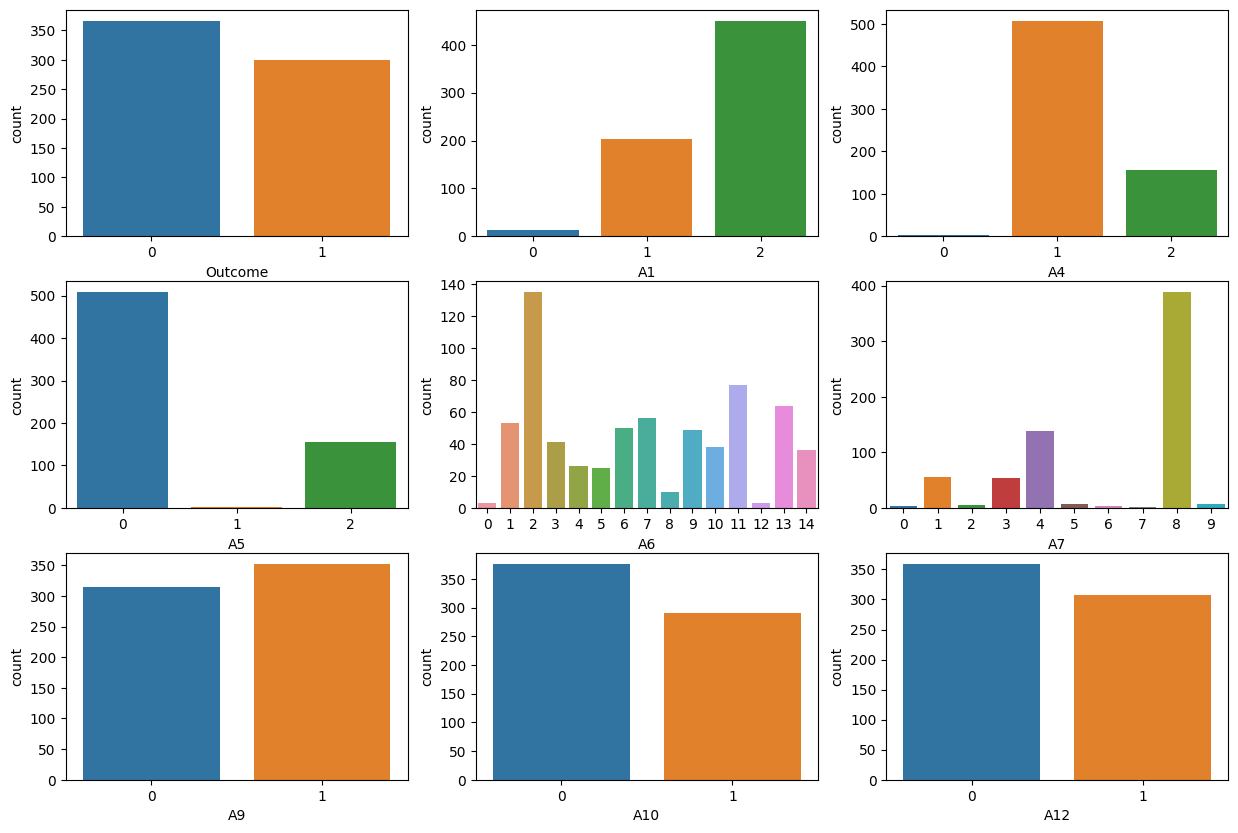

In [62]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(data = df, x ='Outcome', ax=ax[0,0])
sns.countplot(data = df, x ='A1', ax=ax[0,1])
sns.countplot(data = df, x ='A4', ax=ax[0,2])

sns.countplot(data = df, x ='A5', ax=ax[1,0])
sns.countplot(data = df, x ='A6', ax=ax[1,1])
sns.countplot(data = df, x ='A7', ax=ax[1,2])

sns.countplot(data = df, x ='A9', ax=ax[2,0])
sns.countplot(data = df, x ='A10', ax=ax[2,1])
sns.countplot(data = df, x ='A12', ax=ax[2,2])

plt.show()
plt.show()

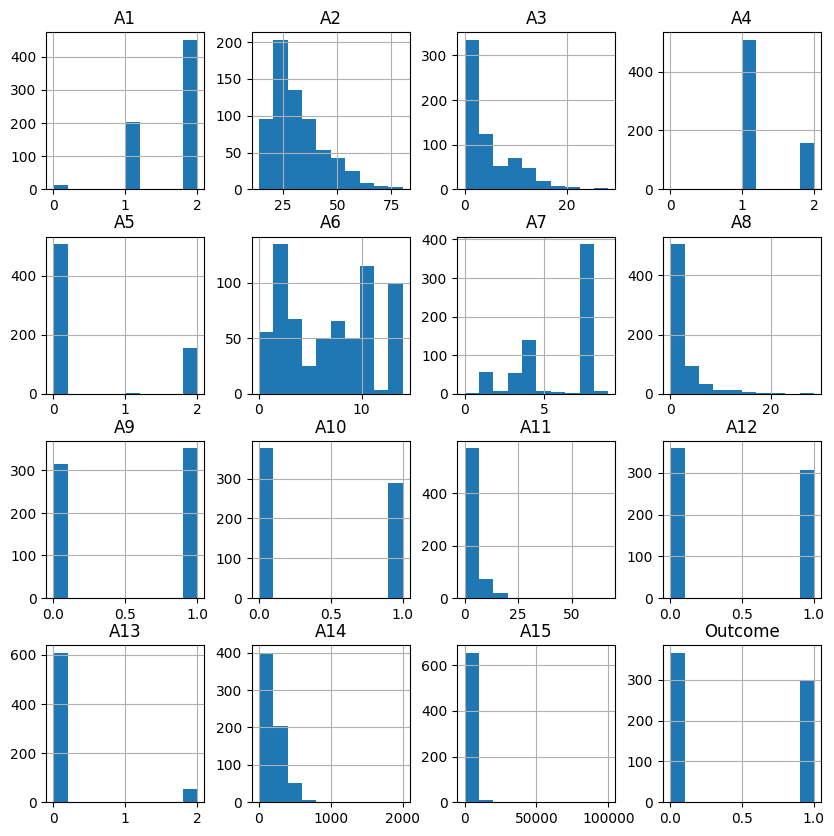

In [63]:
df.hist(figsize=(10,10))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

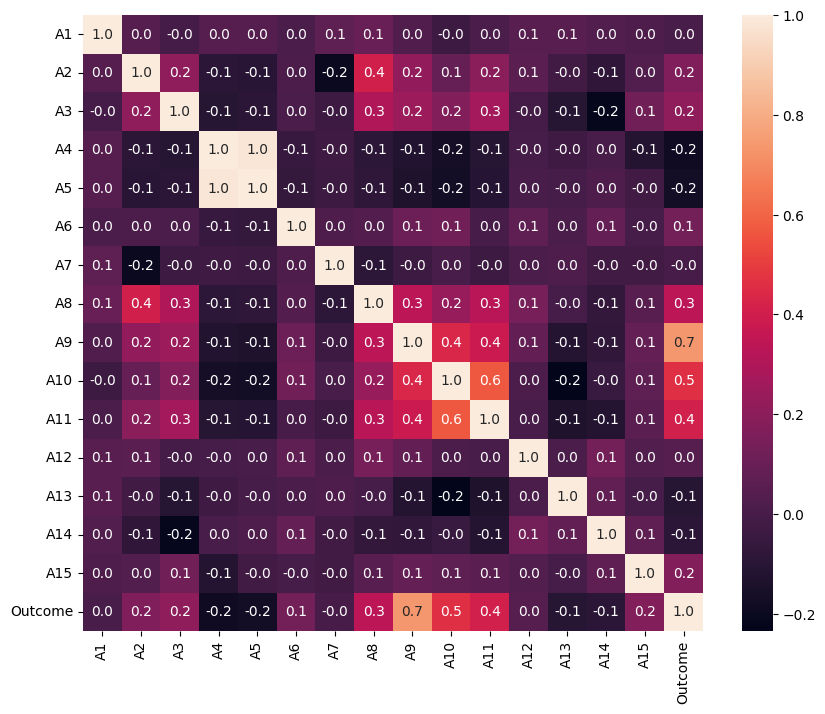

In [64]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')
plt.show

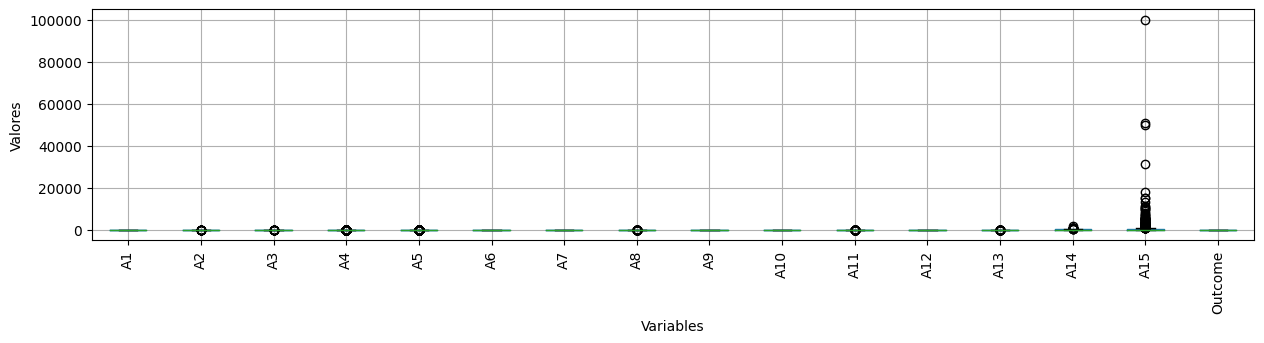

In [65]:
plt.figure(figsize=(15, 3))

df[df.columns].boxplot()
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.xticks(rotation=90)

plt.show()

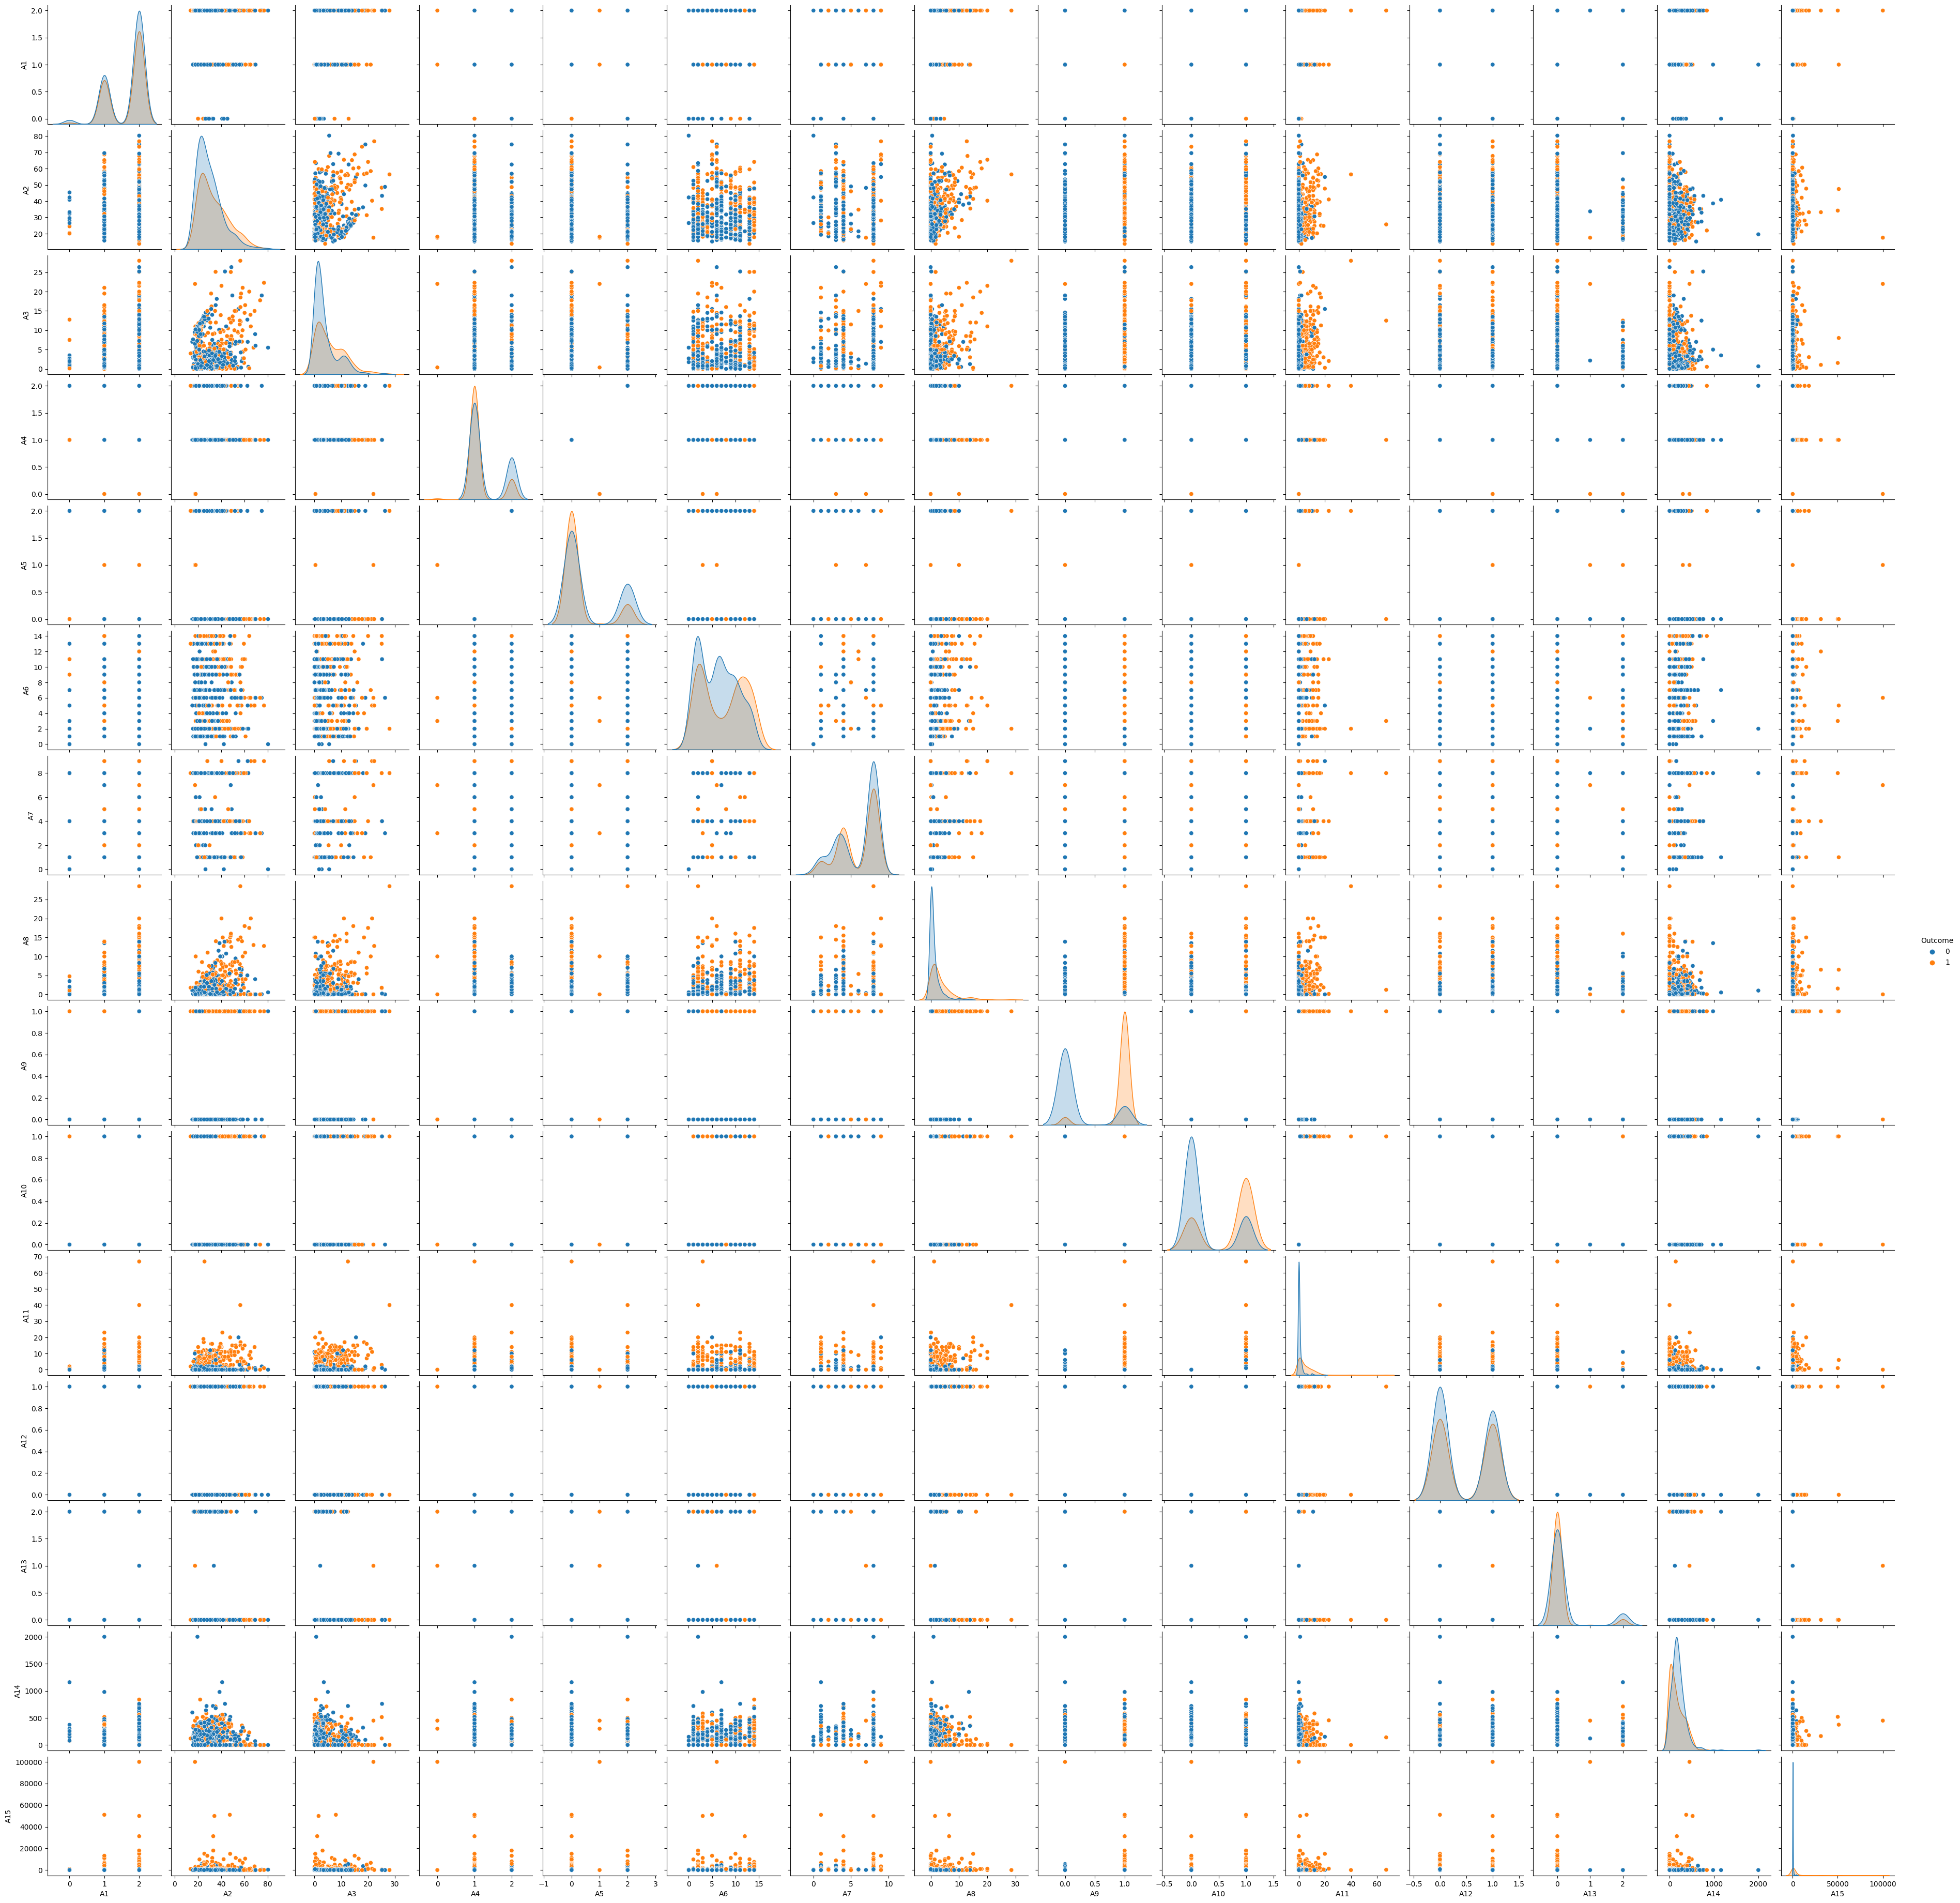

In [140]:
sns.pairplot(df, hue = 'Outcome')

**Select Best Features**

In [66]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

f_scores, p_values = f_regression(X, y)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df

,Feature,F_Score,P_Value
8,A9,792.323694,2.401595e-115
9,A10,179.730919,1.923945e-36
10,A11,132.053180,5.303968e-28
7,A8,84.049673,5.960454e-19
2,A3,31.658659,2.711248e-08
3,A4,23.284977,1.734423e-06
4,A5,20.854772,5.905603e-06
14,A15,20.457718,7.221045e-06
1,A2,18.179102,2.302386e-05
5,A6,11.307861,8.161125e-04


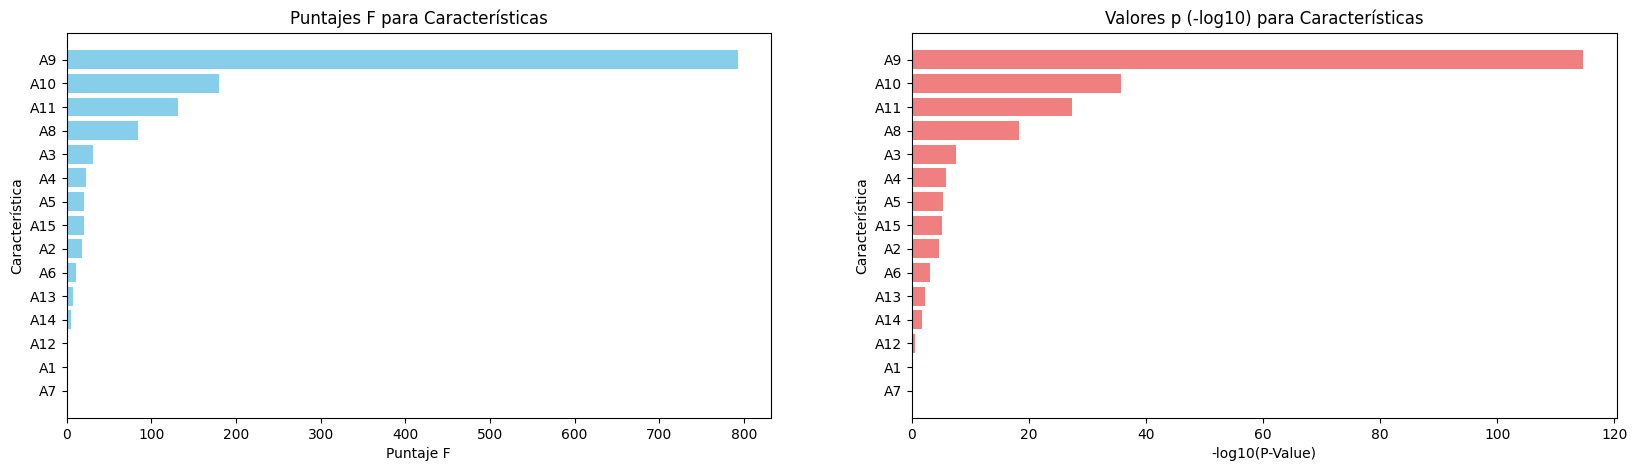

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='skyblue')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')


ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [96]:
cols = feature_scores_df[feature_scores_df['F_Score']>=10].Feature.to_list()

**Modeling and Evaluation**

In [97]:
X_M = df[cols]
Y_M = df['Outcome']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

**Train Test Split**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

**Logistic Regression**

In [99]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       113
           1       0.79      0.86      0.82        87

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

accuracy:  0.84
mean_absolute_error:  0.16
mean_squared_error:  0.16


**Random Forest Classifier**

In [100]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       113
           1       0.82      0.80      0.81        87

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

accuracy:  0.84
mean_absolute_error:  0.16
mean_squared_error:  0.16


**Decision Tree**

In [101]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       113
           1       0.80      0.76      0.78        87

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

accuracy:  0.815
mean_absolute_error:  0.185
mean_squared_error:  0.185


**SVC**

In [102]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       113
           1       0.77      0.90      0.83        87

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200

accuracy:  0.84
mean_absolute_error:  0.16
mean_squared_error:  0.16


**KNeighborsClassifier**

In [103]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       113
           1       0.83      0.78      0.80        87

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

accuracy:  0.835
mean_absolute_error:  0.165
mean_squared_error:  0.165


0    113
1     87
Name: Outcome, dtype: int64


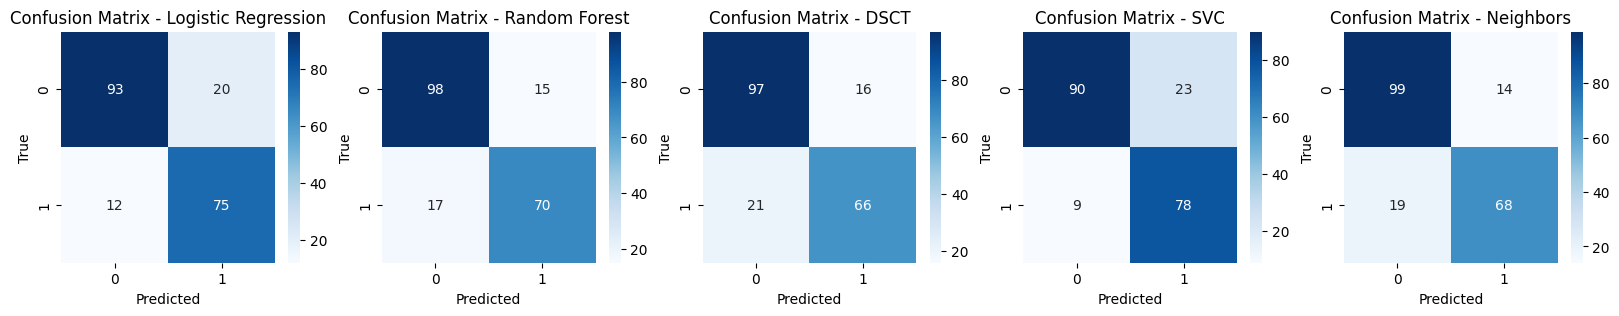

In [104]:
from sklearn.metrics import confusion_matrix

RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

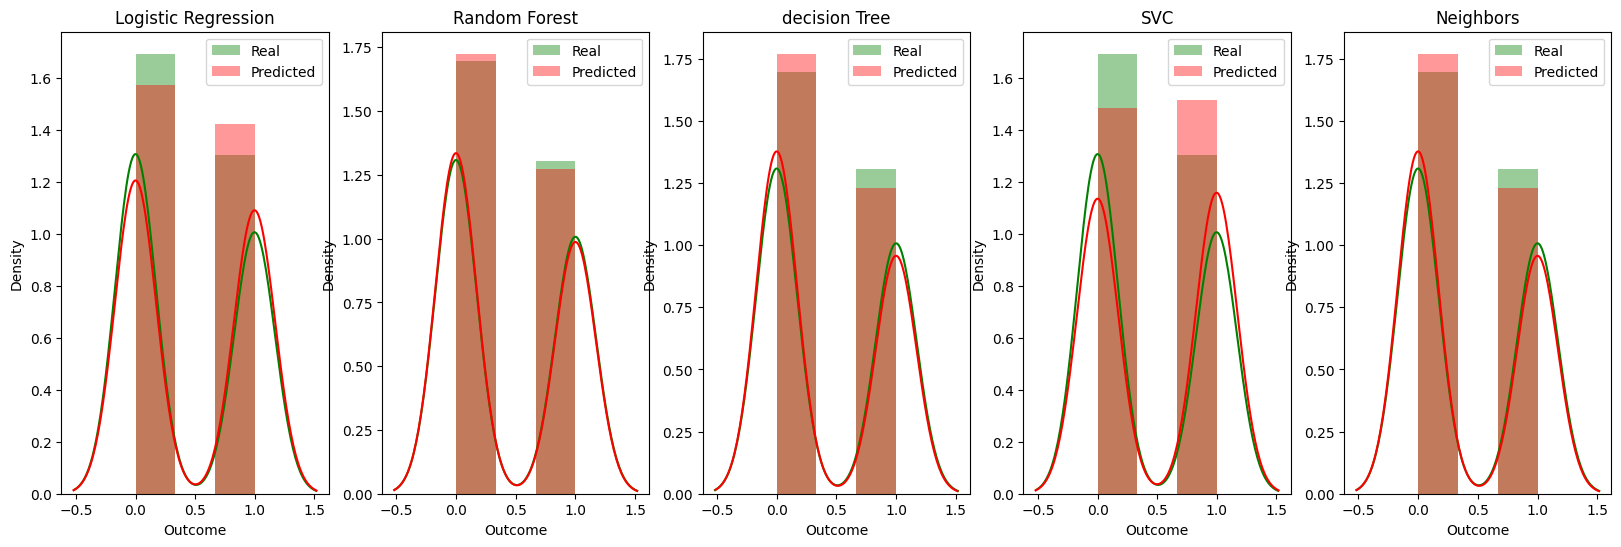

In [105]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()